## Font type Recognition using <font color= #70e514>Logistic Regression</font>

### Example form:

<img src=https://img1.od-cdn.com/ImageType-400/6135-1/67E/936/4A/%7B67E9364A-5248-4174-917C-549ED505ABC6%7DImg400.jpg height="200" width="160">



* <font size=5 color='green'>[MSTC](http://mstc.ssr.upm.es/big-data-track) seminar on Deep Learning, Tensorflow & Keras</font>

In [0]:
import tensorflow as tf
import numpy as np


In [2]:
a = np.arange(15)
a

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

In [3]:
a.shape

(15,)

In [4]:
a.reshape(3, 5)


array([[ 0,  1,  2,  3,  4],
       [ 5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14]])

In [0]:
images=np.array([[[1,2],[3,4]],
                [[5,6],[7,8]],
                [[9,10],[11,12]]])

In [6]:
images.shape

(3, 2, 2)

In [7]:
images.reshape([-1,4])

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [8]:
 !pip install tqdm

    100% |████████████████████████████████| 51kB 3.6MB/s 


In [0]:
try:
    from tqdm import tqdm
except ImportError:
    def tqdm(x, *args, **kwargs):
        return x

# Loading data...



In [0]:
"""
Load data
"""

import os
from six.moves import urllib

file_url = 'https://github.com/bloolizard/PlayWithTensorFlow/raw/master/data_with_labels.npz'
file_name = 'data_with_labels.npz'

if not os.path.exists(file_name):
    urllib.request.urlretrieve(file_url, file_name)
    
# Load data
data = np.load('data_with_labels.npz')

train = data['arr_0']/255.
labels = data['arr_1']


### Data: 2790 36x36 images

In [11]:
train.shape

(2790, 36, 36)

In [0]:
# If you have matplotlib installed
import matplotlib.pyplot as plt
%matplotlib inline

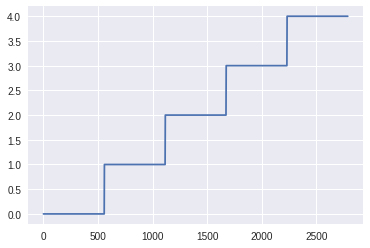

In [13]:
plt.plot(labels)

... let's see one image...

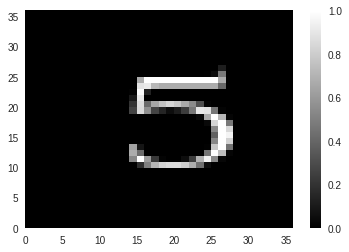

In [14]:
plt.pcolor(train[50], cmap=plt.cm.gray)
plt.colorbar()


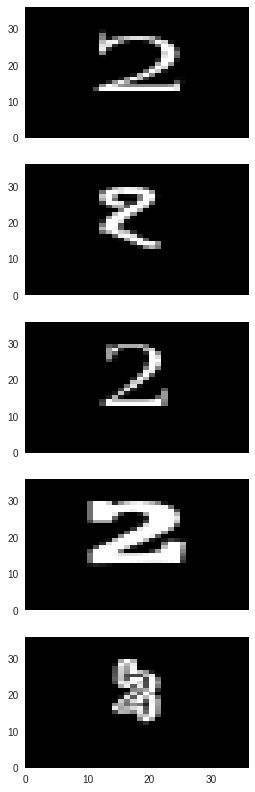

In [15]:

# Let's look at a subplot of one of A in each font
f, plts = plt.subplots(5, figsize=(4,14), sharex=True)
c = 20
for i in range(5):
    plts[i].pcolor(train[c + i * 558],
                   cmap=plt.cm.gray)

In [0]:
def to_onehot(labels,nclasses):
    '''
    Convert labels to "one-hot" format.
    >>> a = [0,1,2,3]
    >>> to_onehot(a,5)
    array([[ 1.,  0.,  0.,  0.,  0.],
           [ 0.,  1.,  0.,  0.,  0.],
           [ 0.,  0.,  1.,  0.,  0.],
           [ 0.,  0.,  0.,  1.,  0.]])
    '''
    outlabels = np.zeros((len(labels),nclasses))
    for i,l in enumerate(labels):
        outlabels[i,l] = 1
    return outlabels

onehot = to_onehot(labels,5)

In [17]:
onehot.shape

(2790, 5)

In [18]:
print(onehot[10])

[1. 0. 0. 0. 0.]


### Permutation! + split data into training / validation

In [0]:
np.random.seed(100)

indices = np.random.permutation(train.shape[0])

In [20]:
indices[:10]

array([2266, 1012, 2759, 1211, 2166, 2010,  205,  328, 1104,  500])

In [0]:
# Split data into training (90%) and validation (10%)
indices = np.random.permutation(train.shape[0])

valid_cnt = int(train.shape[0] * 0.1)

test_idx, training_idx = indices[:valid_cnt],\
                         indices[valid_cnt:]
  
test, train = train[test_idx,:],\
              train[training_idx,:]
  
onehot_test, onehot_train = onehot[test_idx,:],\
                        onehot[training_idx,:]

In [22]:
print('Train shape: ',train.shape)
print('Test shape: ', test.shape)

Train shape:  (2511, 36, 36)
Test shape:  (279, 36, 36)


In [23]:
onehot_test[0:5]

array([[0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1.],
       [0., 1., 0., 0., 0.]])

In [24]:
36*36

1296

## **Complete Graph Definition:**

In [0]:
# These will be inputs
## Input pixels, flattened
x = tf.placeholder("float", [None, 1296])
## Known labels
y_ = tf.placeholder("float", [None,5])

# Variables
W = tf.Variable(tf.random_normal([1296, 5], stddev=0.1), name="weight")
b = tf.Variable(tf.zeros([5]), name="bias")

# Define model
y = tf.add(tf.matmul(x,W), b)


### End model specification, begin training code


# Loss function: cross-entropy
cross_entropy = tf.reduce_mean(
        tf.nn.softmax_cross_entropy_with_logits_v2(
        logits=y + 1e-50, labels=y_))


# How we train
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(cross_entropy)

# Just initialize
init = tf.global_variables_initializer()

# Define accuracy
correct_prediction = tf.equal(tf.argmax(y,1),tf.argmax(y_,1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, "float"))


# **...Training...**

In [26]:
# Actually train
epochs = 1000

# aux arrays to store train and test accuracy results
# once every 10 epochs

train_acc = np.zeros(epochs//10)
test_acc = np.zeros(epochs//10)

with tf.Session() as sess:
    
    sess.run(init)

    for i in tqdm(range(epochs)):
      # Record summary data, and the accuracy
      if i % 10 == 0:
        # Check accuracy on train set
        A = accuracy.eval(feed_dict={
            x: train.reshape([-1,1296]),
            y_: onehot_train})
        train_acc[i//10] = A
        # And now the validation set
        A = accuracy.eval(feed_dict={
            x: test.reshape([-1,1296]),
            y_: onehot_test})
        test_acc[i//10] = A
        
      # ALL data is used in every run (i.e. no minibatches)    
      train_step.run(feed_dict={
        x: train.reshape([-1,1296]),
        y_: onehot_train})
      
      
    # Get the final values of W 
    W_out = W.eval()
    
    # Get the test logits
    y_logits = y.eval(feed_dict={
            x: test.reshape([-1,1296]),
            y_: onehot_test})
    
    sess.close()

100%|██████████| 1000/1000 [00:24<00:00, 40.31it/s]


Train Accuracy:  0.8
Test_Accuracy:  0.71


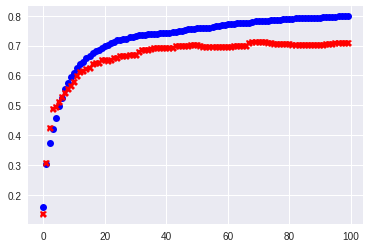

In [27]:
# Notice that accuracy flattens out
print('Train Accuracy: ',np.round(train_acc[-1],2))
print('Test_Accuracy: ',np.round(test_acc[-1],2))

# Plot the accuracy curves
plt.plot(train_acc,'bo')
plt.plot(test_acc,'rX')




# Exploring the information in Weights Matrix

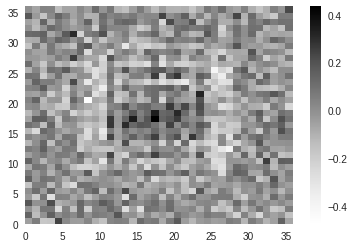

In [30]:
# Look at the weights for each font

plt.pcolor(W_out[:,4].reshape([36,36]))
plt.colorbar()


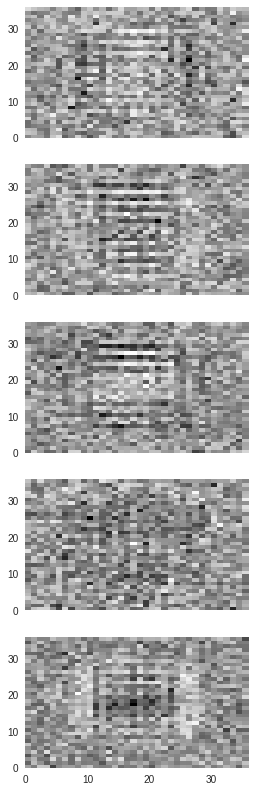

In [31]:
# Look at a subplot of the weights for each font
f, plts = plt.subplots(5, figsize=(4,14), sharex=True)
for i in range(5):
    plts[i].pcolor(W_out[:,i].reshape([36,36]))
